In [1]:
# using VMLS
using LinearAlgebra

## Chapter 9
# Linear dynamical systems
### 9.1 Linear dynamical systems
Let’s simulate a time-invariant linear dynamic system 
$$
x_{t+1} = Ax_t, t = 1, . . . , T,
$$
with dynamics matrix
$$
A =
\begin{bmatrix}
0.97 &  0.10  & −0.05 \\
−0.3 &  0.99  & 0.05 \\
0.01 &  −0.04 &  0.96
\end{bmatrix}
$$

and initial state $x_1 = (1, 0,−1)$. We store the state trajectory in the $n × T$ matrix
`state_traj`, with the $i$th column $x_t$. We plot the result in Figure 9.1.

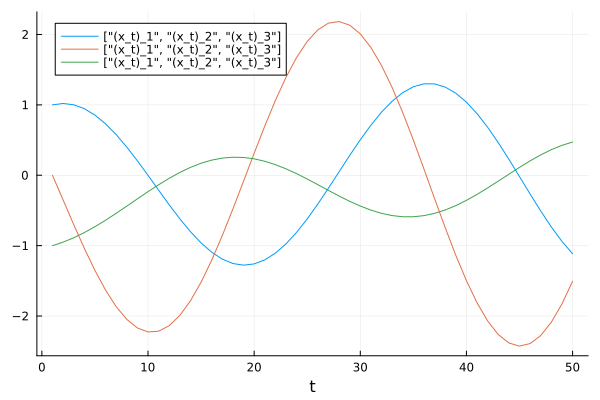

In [2]:
x_1 = [1,0,-1]; # initial state
n = length(x_1); T = 50;
A = [ 0.97 0.10 -0.05 ; -0.3 0.99 0.05 ; 0.01 -0.04 0.96 ]
state_traj = [x_1 zeros(n,T-1) ];
for t=1:T-1 # Dynamics recursion
state_traj[:,t+1] = A*state_traj[:,t];
end
using Plots
plot(1:T, state_traj', xlabel = "t", label = ["(x_t)_1", "(x_t)_2", "(x_t)_3"])

**Figure 9.1** Linear dynamical system simulation.

### 9.2 Population dynamics
We can create a population dynamics matrix with just one simple line of Julia. The following code predicts the 2020 population distribution in the US using the data of Section [9.2](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section.9.2) of VMLS, which are available through the VMLS function `population_data`. The result is shown in Figure 9.2.

In [3]:
# Import 3 100-vectors: population, birth_rate, death_rate
D = population_data();
b = D["birth_rate"];
d = D["death_rate"];
A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)];
x = D["population"];
for k = 1:10
global x
x = A*x;
end;
using Plots
plot(x, legend=false, xlabel = "Age", ylabel = "Population (millions)")

LoadError: UndefVarError: `population_data` not defined

**Figure 9.2** Predicted age distribution in the US in 2020.


Note the keyword `global` in the for-loop. Without this statement, the scope of the
variable x created by the assignment `x = A*x` would be local to the for-loop, i.e.,
this variable does not exist outside the loop and is different from the `x` outside the
loop.

**9.3 Epidemic dynamics**
Let’s implement the simulation of the epidemic dynamics from VMLS §[9.3](https://web.stanford.edu/\\%7Eboyd/vmls/vmls.pdf#section.9.3). The plot is in figure 9.3.

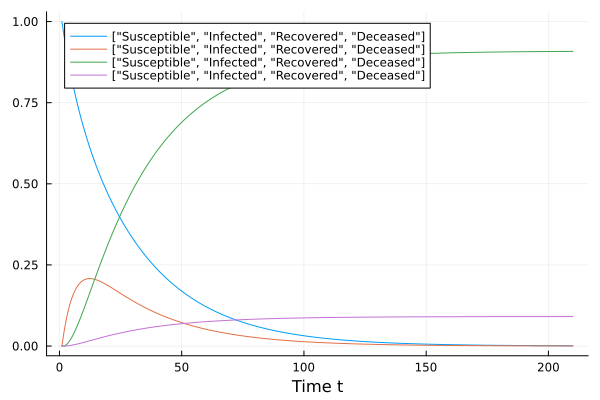

In [4]:
T = 210;
A = [ 0.95 0.04 0 0 ; 0.05 0.85 0 0 ; 0 0.10 1 0 ; 0 0.01 0 1 ];
x_1 = [1,0,0,0];
state_traj = [x_1 zeros(4,T-1) ]; # State trajectory
for t=1:T-1 # Dynamics recursion
state_traj[:,t+1] = A*state_traj[:,t];
end
using Plots
plot(1:T, state_traj', xlabel = "Time t", label = ["Susceptible", "Infected", "Recovered", "Deceased"])

**Figure 9.3** Simulation of epidemic dynamics.

**9.4 Motion of a mass**
Let’s simulate the discretized model of the motion of a mass in §[9.4](https://web.stanford.edu/~boyd/vmls/vmls.pdf#section.9.4) of VMLS. See figure 9.4.

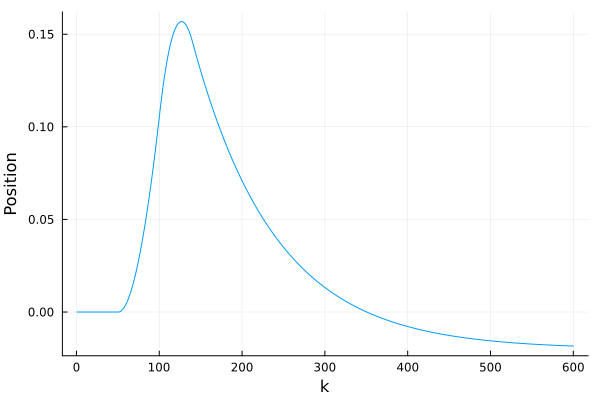

In [5]:
h = 0.01; m = 1; eta = 1;
A = [ 1 h ; 0 1-h*eta/m ];
B = [ 0 ; h/m ];
x1 = [0,0];
K = 600; # simulate for K*h = 6 seconds
f = zeros(K); f[50:99] .= 1.0; f[100:139] .= -1.3;
X = [x1 zeros(2,K-1)];
for k=1:K-1
X[:,k+1] = A* X[:,k] + B*f[k]
end
using Plots
plot(X[1,:], xlabel="k", ylabel="Position", legend=false )

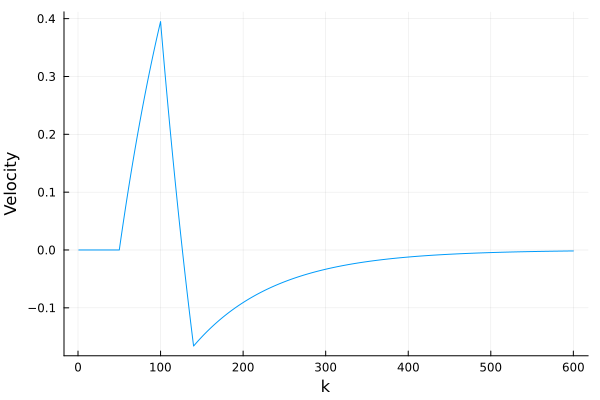

In [6]:
plot(X[2,:], xlabel="k", ylabel="Velocity", legend=false )

**Figure 9.4** Simulation of a mass moving along a line: position (top) and
velocity (bottom).